<a href="https://colab.research.google.com/github/a00377571/IBM-Python101/blob/main/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC 5033
### Word Embeddings


<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pickle
plt.style.use('ggplot')

#### Load GloVe pre-trained vectors, file Glove.6B.50d

GloVe is an unsupervised learning algorithm developed by Pennington, Socher, and Manning in 2014 for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PATH = 'data/glove.6B.50d.txt'
PATH = '/content/drive/MyDrive/MNA/DL/embeddings/glove.6B.50d.txt'
emb_dim = 50

#### Create a dictorionay of the embeddings

The 'create_emb_dictionary' function creates a dictionary where words are assigned as the dictionary keys, and the value is the embedding (a 50-dimensional vector in this case).

This dictionary will be used to look up word embeddings based on specific words.

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
   embeddings_dict = {}
   with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings_dict[word] = vector
   return embeddings_dict


In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

An a .pkl file is generated, which means that the objects will be converted into a sequence of bytes. Creating this file will ease up next runs or future implementations using this dictionary

In [ ]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings
The function 'show_n_first_words' displays n first embbendings on dictionary

In [ ]:
# Show some words
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

We see that each element consists of a word followed by the vector entries that make up the embedding.

We also observe that the vector entries are real numbers so, we find both negative and positive numbers, this provides flexibility for many meanings and contexts of each word to be captured within these 50 dimensions.

### Plot some embeddings
The function 'plot_embeddings' it's used to visualize word embeddings in 2D space, making it easier to will understand relationships between words in a lower-dimensional projection.

The function reduces the dimension of the information using PCA or TSNE algorithms.

In [ ]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):

  # Extract word vectors for the words to be visualized
  word_vectors = [embeddings_dict[word] for word in words2show]

  # Apply dimensionality reduction (PCA or t-SNE)
  if func == PCA:
        reducer = PCA(n_components=2)
        reduced_embeddings = reducer.fit_transform(word_vectors)
  elif func == TSNE:
        reducer = TSNE(n_components=2, perplexity=30, n_iter=1000)
        reduced_embeddings = reducer.fit_transform(np.array(word_vectors))
  else:
        raise ValueError("Unsupported dimensionality reduction method")


  # Plot the reduced embeddings
  plt.figure(figsize=(15, 8))
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

  # Label data points with words
  for i, word in enumerate(words2show):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

  plt.show()


In [ ]:
#list of words
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


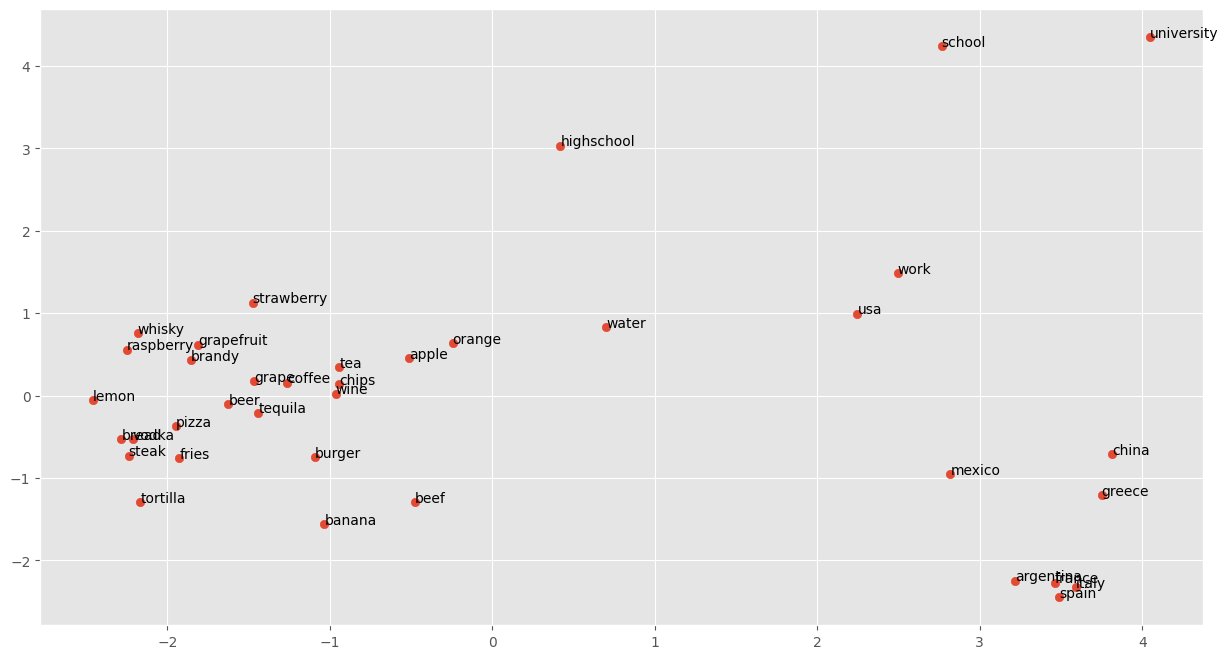

In [ ]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, func = PCA)

Applying the PCA algorithm to reduce the dimension of embedding the 50-dimensional to 2, we observe that words cluster according to their relationships.

In the upper-right quadrant, we see that certain places like 'school,' 'high school,' 'university,' etc., are grouped together. In the lower-right quadrant, we see the grouping of words referring to countries, and finally, in the lower-left quadrant, we observe words related to beverages and food.


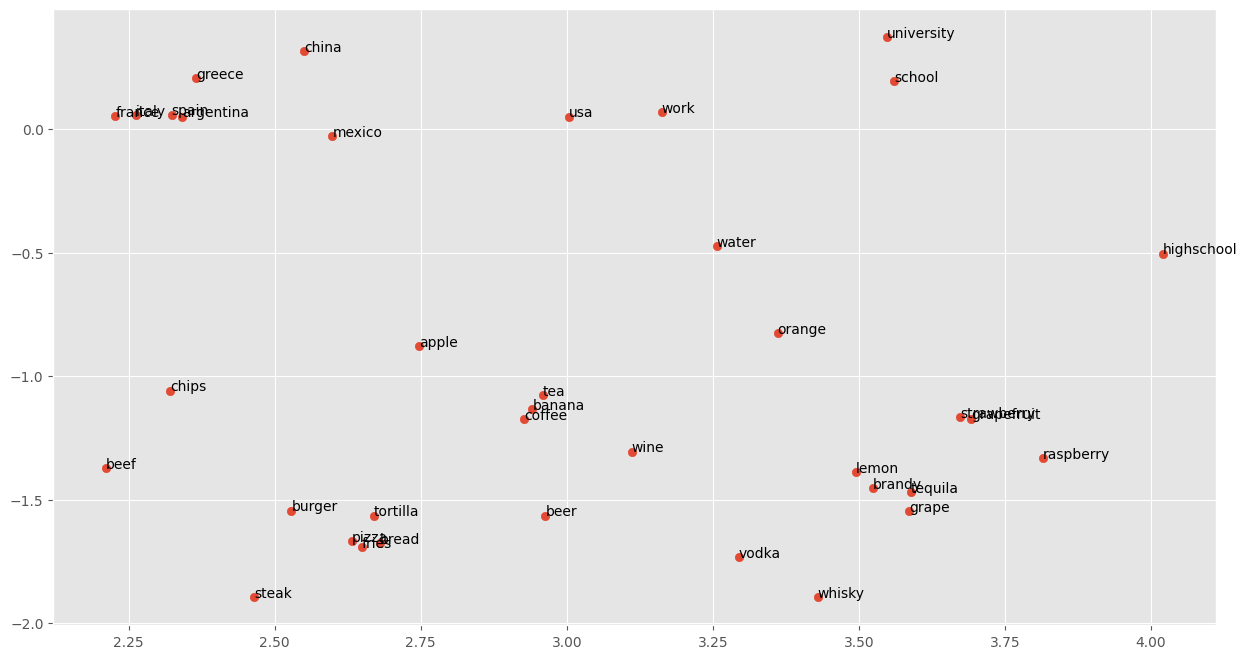

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

Applying the TSNE algorithm to reduce the dimension of the 50-dimensional embedding to 2 dimensions, when visualizing we can see improvements compared to result of PCA algorithm, unlike the latter TSNE identifies a separation between beverages, fruits, meat and fries, and it also maintains the groups of words associated with countries and places that had already been identified in the PCA analysis.

### Most Similar
The function 'find_most_similar' was defined in order to find the set of words most similar to a given input word, based on pre-trained word embeddings.

The distance measure used to find the similarity between the input word's vector and the vectors of other words in the embeddings dictionary is the cosine measure.

In [ ]:
def find_most_similar(word, embeddings_dict, top_n=100):
    if word in embeddings_dict:
        # Get the vector for the input word
        word_vector = embeddings_dict[word]

        # Calculate cosine similarity for all words in the dictionary
        similarities = {}
        for other_word, other_vector in embeddings_dict.items():
            if other_word != word:  # Skip the input word itself
                similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
                similarities[other_word] = similarity

        # Sort words by similarity score and get the top 'n' words
        similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

        return similar_words
    else:
        return "Word not in the dictionary"


To test the most similar function we will use the word 'mexico' and print the first 50 entries

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict, top_n = 50)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
11 ---> brazil
12 ---> costa
13 ---> bolivia
14 ---> ecuador
15 ---> argentina
16 ---> rica
17 ---> honduras
18 ---> nicaragua
19 ---> salvador
20 ---> spain
21 ---> philippines
22 ---> dominican
23 ---> san
24 ---> paraguay
25 ---> california
26 ---> uruguay
27 ---> chilean
28 ---> francisco
29 ---> america
30 ---> venezuelan
31 ---> neighboring
32 ---> states
33 ---> republic
34 ---> caribbean
35 ---> region
36 ---> southeastern
37 ---> veracruz
38 ---> buenos
39 ---> southern
40 ---> cuban
41 ---> southeast
42 ---> aires
43 ---> florida
44 ---> mexicans
45 ---> colombian
46 ---> province
47 ---> diego
48 ---> coast
49 ---> eastern
50 ---> santa


The result shows that the most similat word is 'mexican' followed by several latin american countries and some US states and regions.

### Let us compute analogies
The analogy function is defined with the following parameters: word1, word2, word3, embeddings_dict.

If all three input words are found in the dictionary, the function calculate a word analogy throught the next operation:
\begin{align}
 word4 = word2 - word1 + word3
\end{align}

The function analogy compares the vector vec4 with all other word vectors in the dictionary to find the most similar word using cosine similarity.

\begin{align}
\text{similarity}=cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}
\end{align}


In [ ]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
  if word1 in embeddings_dict and word2 in embeddings_dict and word3 in embeddings_dict:
        # Get vectors for the words
        vec1 = embeddings_dict[word1]
        vec2 = embeddings_dict[word2]
        vec3 = embeddings_dict[word3]

        # Calculate the analogy: word4 = word2 - word1 + word3
        vec4 = vec2 - vec1 + vec3

        # Find the most similar word to vec4 using cosine similarity
        most_similar_word = None
        highest_similarity = -1  # Initialize to a negative value

        for word, vec in embeddings_dict.items():
            # Make sure not to compare with the input words
            if word not in (word1, word2, word3):
                similarity = np.dot(vec4, vec) / (np.linalg.norm(vec4) * np.linalg.norm(vec))
                if similarity > highest_similarity:
                    highest_similarity = similarity
                    most_similar_word = word

        print(f'{word1} is to {word2} as {word3} is to {most_similar_word}')
        return most_similar_word
  else:
    return "Words not in the dictionary"

In [ ]:
analogy('man', 'king', 'woman', embeddings_dict)

man is to king as woman is to queen


'queen'

### Conclusion
With algorithms like GloVe, we obtain word embeddings that help models better understand our language and provide more accurate results than models fed with one-hot encoded words. Added to this, this embeddings saves time and compute time when used as base to train


###  PCA and t-SNE Visualization



In [ ]:
def visualize_word_embeddings(embeddings_dict, num_words=100):
    # Extract word vectors
    words = list(embeddings_dict.keys())[:num_words]
    word_vectors = np.array([embeddings_dict[word] for word in words])

    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    # Perform t-SNE for further dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
    tsne_result = tsne.fit_transform(pca_result)

    # Create a scatter plot
    x = tsne_result[:, 0]
    y = tsne_result[:, 1]

    plt.figure(figsize=(10, 8))
    plt.scatter(x, y)

    # Label data points with words
    for i, word in enumerate(words):
        plt.annotate(word, (x[i], y[i]))

    plt.show()

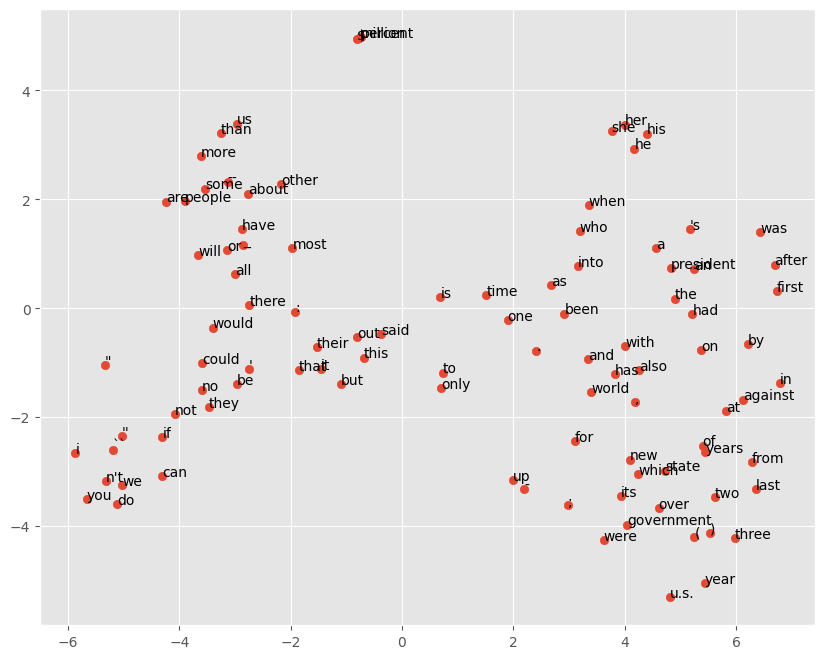

In [ ]:
visualize_word_embeddings(embeddings_dict, num_words=100)

As a last approach, we wanted to implement the visualization of the embedded words by applying PCA, and to the results of this apply TSNE to observe the observed graph of this, this to verify that the results obtained have presented a better correlation between the most similar words, however , it seems that although the closest words do have a strong correlation such as personal pronouns, prepositions, etc., we can see that it is not better than applying TSNE and PCA separately, whether applying PCA first then TSNE or vice versa, the result is not is better.